In [1]:
L = [3, 1, 4, 1, 5, 9, 2, 6]
sorted(L)

[1, 1, 2, 3, 4, 5, 6, 9]

In [2]:
L.sort()  # acts in-place and returns None
print(L)

[1, 1, 2, 3, 4, 5, 6, 9]


In [3]:
sorted('python')

['h', 'n', 'o', 'p', 't', 'y']

In [4]:
import numpy as np

x = np.array([2, 1, 4, 3, 5])
np.sort(x)

array([1, 2, 3, 4, 5])

In [5]:
x.sort()
print(x)

[1 2 3 4 5]


In [6]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
print(i)

[1 0 3 2 4]


In [7]:
x[i]

array([1, 2, 3, 4, 5])

In [8]:
rng = np.random.default_rng(seed=42)
X = rng.integers(0, 10, (4, 6))
print(X)

[[0 7 6 4 4 8]
 [0 6 2 0 5 9]
 [7 7 7 7 5 1]
 [8 4 5 3 1 9]]


In [9]:
np.sort(X, axis=0)

array([[0, 4, 2, 0, 1, 1],
       [0, 6, 5, 3, 4, 8],
       [7, 7, 6, 4, 5, 9],
       [8, 7, 7, 7, 5, 9]], dtype=int64)

In [10]:
np.sort(X, axis=1)

array([[0, 4, 4, 6, 7, 8],
       [0, 0, 2, 5, 6, 9],
       [1, 5, 7, 7, 7, 7],
       [1, 3, 4, 5, 8, 9]], dtype=int64)

In [11]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

In [12]:
np.partition(X, 2, axis=1)

array([[0, 4, 4, 7, 6, 8],
       [0, 0, 2, 6, 5, 9],
       [1, 5, 7, 7, 7, 7],
       [1, 3, 4, 5, 8, 9]], dtype=int64)

In [13]:
X = rng.random((10, 2))

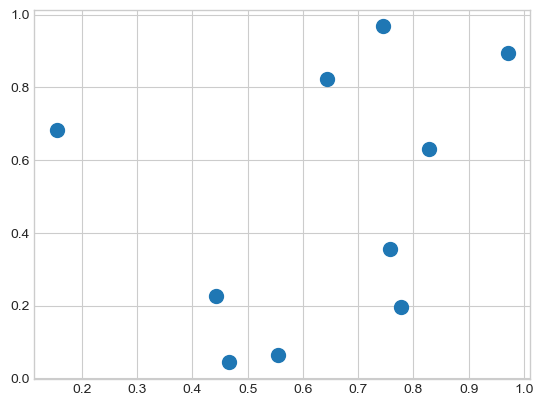

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.scatter(X[:, 0], X[:, 1], s=100);

In [15]:
dist_sq = np.sum((X[:, np.newaxis] - X[np.newaxis, :]) ** 2, axis=-1)

In [16]:
differences = X[:, np.newaxis] - X[np.newaxis, :]
differences.shape

(10, 10, 2)

In [17]:
sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [18]:
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

In [19]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [20]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 9 3 5 4 8 1 6 2 7]
 [1 7 2 6 4 8 3 0 9 5]
 [2 7 1 6 4 3 8 0 9 5]
 [3 0 4 5 9 6 1 2 8 7]
 [4 6 3 1 2 7 0 5 9 8]
 [5 9 3 0 4 6 8 1 2 7]
 [6 4 2 1 7 3 0 5 9 8]
 [7 2 1 6 4 3 8 0 9 5]
 [8 0 1 9 3 4 7 2 6 5]
 [9 0 5 3 4 8 6 1 2 7]]


In [21]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

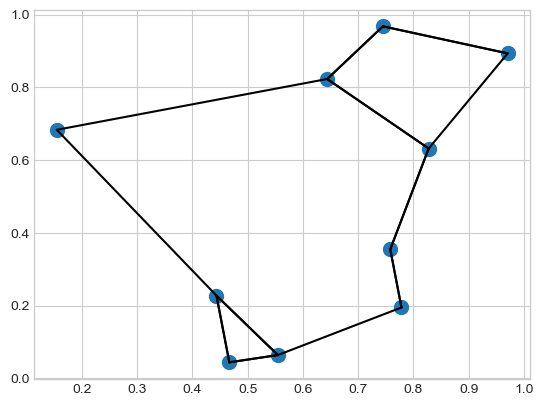

In [22]:
plt.scatter(X[:, 0], X[:, 1], s=100)

# draw lines from each point to its two nearest neighbors
K = 2

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen:
        plt.plot(*zip(X[j], X[i]), color='black')